In [45]:
# Importing necessary libraries
import pandas as pd      # For data manipulation and analysis
import numpy as np       # For numerical computing
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns    # For statistical data visualization

# Setting up the visual style for the plots
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette("pastel")

In [46]:
#read the dataset
df=pd.read_csv('/home/varun/Desktop/kaggles/datasets/Student_Performance.csv')
# Display the first few rows of the dataset to understand its structure
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [47]:
# Check for missing (NaN) values in the dataset
print("\nNull values in each column:")
df.isna().sum()


Null values in each column:


Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

gg

In [48]:
# Display the shape of the dataframe (rows, columns)
print(f"\nShape of the dataset: {df.shape}")


Shape of the dataset: (10000, 6)


In [50]:
# Get summary statistics for the numerical columns
print("\nSummary statistics for numerical columns:")
df.describe()


Summary statistics for numerical columns:


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [51]:
# Get summary statistics for object (categorical) columns
print("\nSummary statistics for categorical (object) columns:")
df.describe(include = object)


Summary statistics for categorical (object) columns:


,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


In [ ]:
# Get detailed info about the dataframe including data types and non-null counts
df.info()


DataFrame Info (Data types and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [53]:
# Count plot function for categorical variables
def count_plot(column_name, data, hue=None, rotation=0, title=None):
    """
    Plots a count plot for a categorical column to show the frequency of each unique value.
    """
    plt.figure(figsize=(10, 6))
    graph = sns.countplot(x=column_name, data=data, hue=hue, order=data[column_name].value_counts().index)
    
    for container in graph.containers:
        graph.bar_label(container)
    
    if title:
        plt.title(title)
    
    plt.xticks(rotation=rotation)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

In [54]:
# Box plot function for numeric columns
def box_plot(x_axis=None, y_axis=None, hue=None, col=None, data=None, title=None):
    """
    Plots a box plot to visualize the distribution of a numeric column.
    """
    sns.catplot(x=x_axis, y=y_axis, data=data, hue=hue, kind="box", col=col)
    
    if title:
        plt.suptitle(title, size=16)
    
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.show()


In [64]:
# Violin plot for distribution with respect to categories
def violin_plot(x_axis, y_axis, data, hue=None, title=None):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=x_axis, y=y_axis, data=data, hue=hue, split=True)
    if title:
        plt.title(title)
    plt.show()

# Pairplot to visualize pairwise relationships between numeric columns
def pair_plot(data, title=None):
    sns.pairplot(data.select_dtypes(exclude='object'))
    if title:
        plt.suptitle(title, size=16)
    plt.show()

# Distribution plot (Histogram + KDE) for numeric variables
def dist_plot(column_name, data, title=None):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column_name], kde=True, color='blue', bins=30)
    if title:
        plt.title(title)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

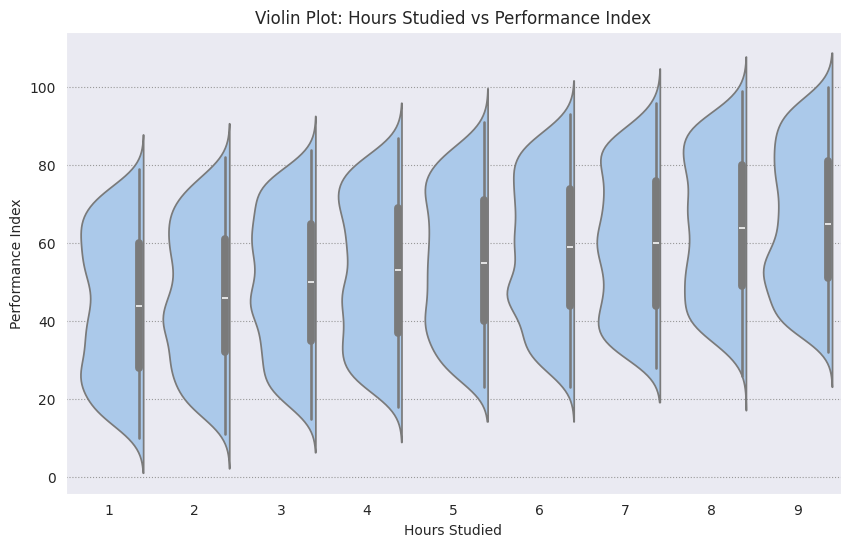

In [65]:
# Violin plot for "Hours Studied" vs "Performance Index"
violin_plot(x_axis="Hours Studied", y_axis="Performance Index", data=df, title="Violin Plot: Hours Studied vs Performance Index")


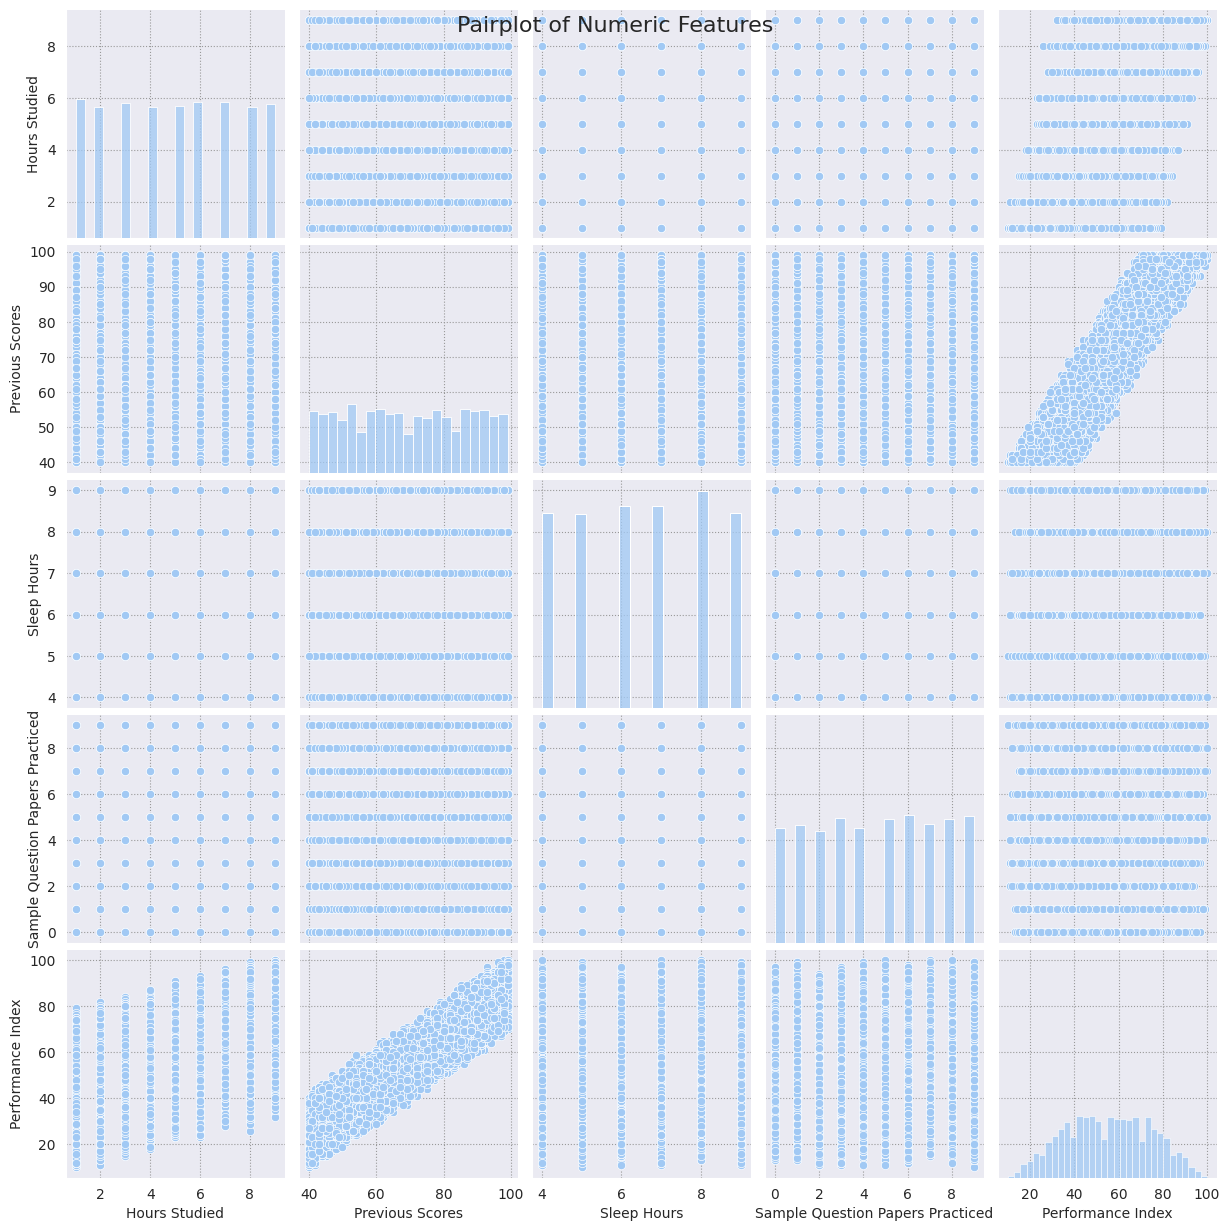

In [66]:
# Pairplot for numerical columns to visualize relationships between numeric features
pair_plot(df, title="Pairplot of Numeric Features")


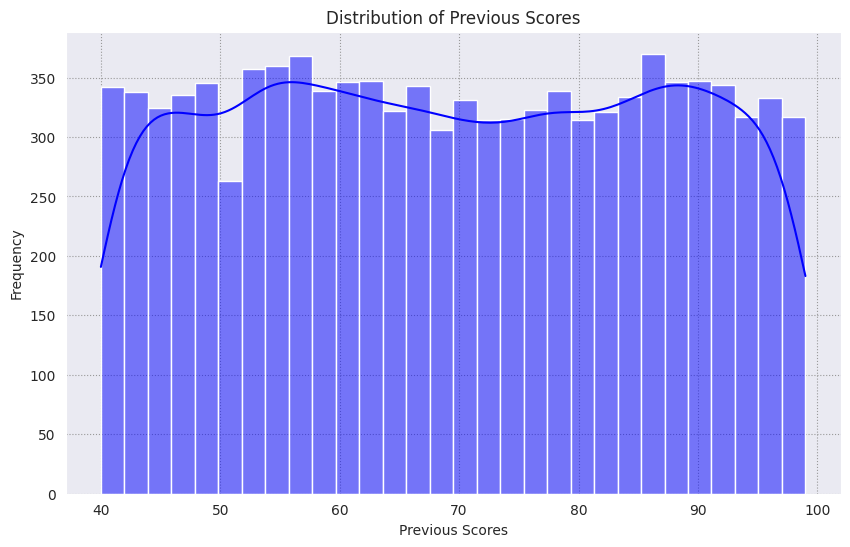

In [69]:
# Distribution plot (Histogram + KDE) for "Previous Scores"
dist_plot(column_name="Previous Scores", data=df, title="Distribution of Previous Scores")

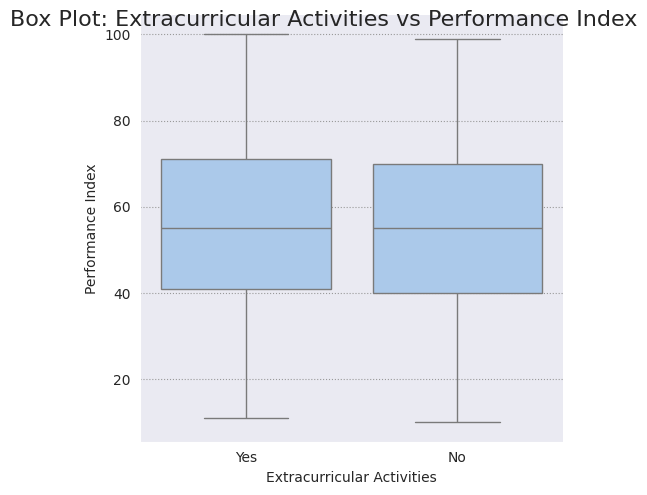

In [70]:
# Box plot for "Extracurricular Activities" vs "Performance Index"
box_plot(x_axis="Extracurricular Activities", y_axis="Performance Index", data=df, title="Box Plot: Extracurricular Activities vs Performance Index")


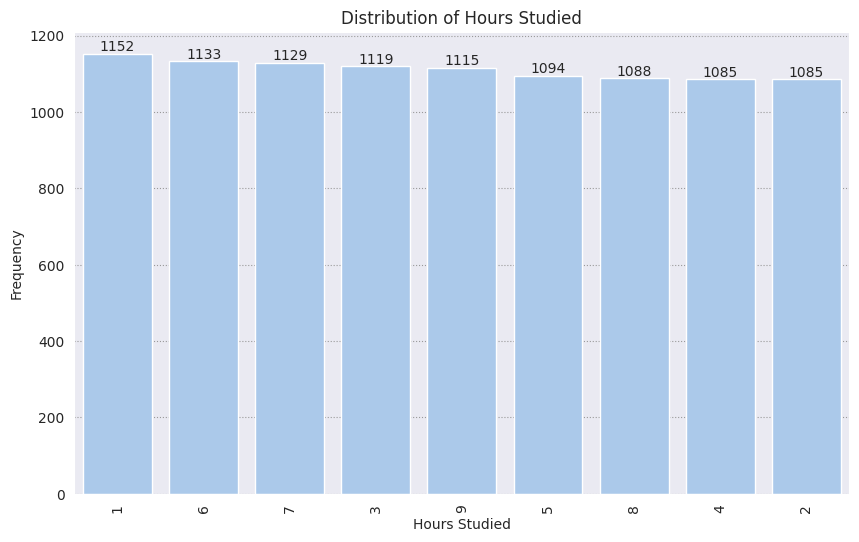

In [55]:
# Visualizing distribution of "Hours Studied"
count_plot(column_name="Hours Studied", data=df, rotation=90, title="Distribution of Hours Studied")

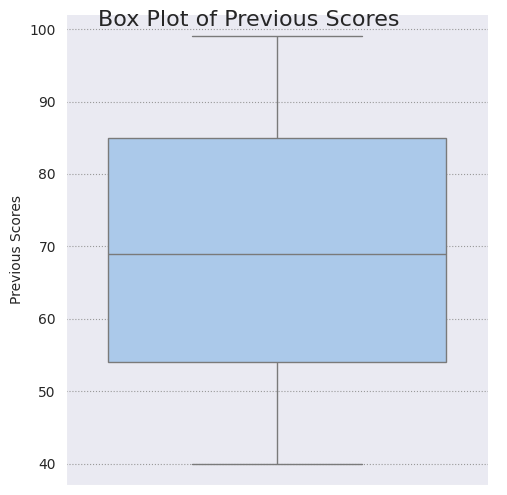

In [56]:
# Visualizing distribution of "Previous Scores"
box_plot(y_axis="Previous Scores", data=df, title="Box Plot of Previous Scores")


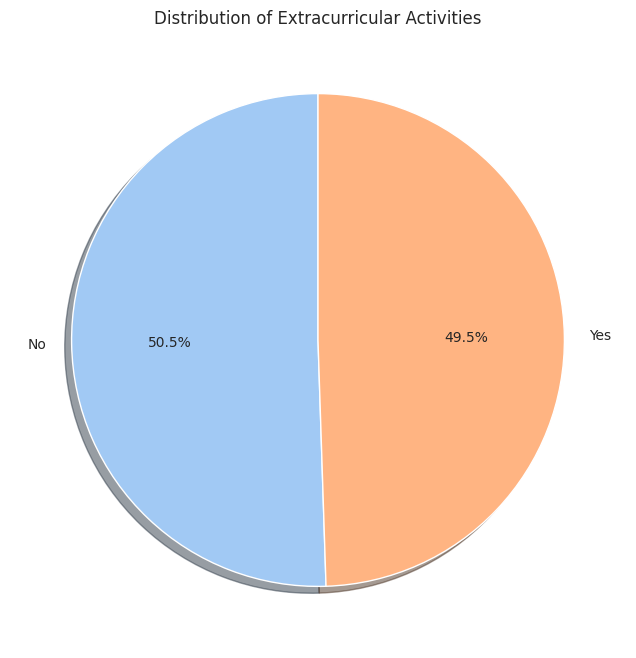

In [57]:
# Visualizing distribution of "Extracurricular Activities" as a pie chart
extracurricular_counts = df["Extracurricular Activities"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(extracurricular_counts, labels=extracurricular_counts.index, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Distribution of Extracurricular Activities")
plt.show()

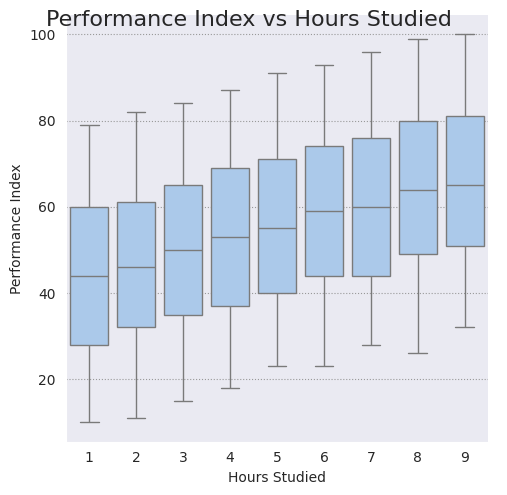

In [58]:
# Exploring the relationship between "Hours Studied" and "Performance Index"
box_plot(x_axis="Hours Studied", y_axis="Performance Index", data=df, title="Performance Index vs Hours Studied")

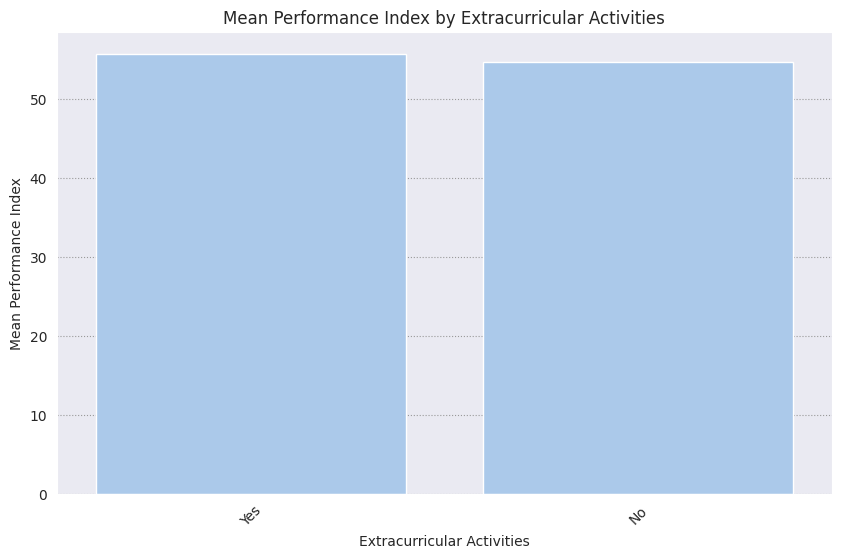

In [72]:
# Bar plot: Mean Performance Index by "Extracurricular Activities"
plt.figure(figsize=(10, 6))
sns.barplot(x=df["Extracurricular Activities"], y=df["Performance Index"], estimator="mean", errorbar=None)
plt.title("Mean Performance Index by Extracurricular Activities")
plt.xlabel("Extracurricular Activities")
plt.ylabel("Mean Performance Index")
plt.xticks(rotation=45)
plt.show()

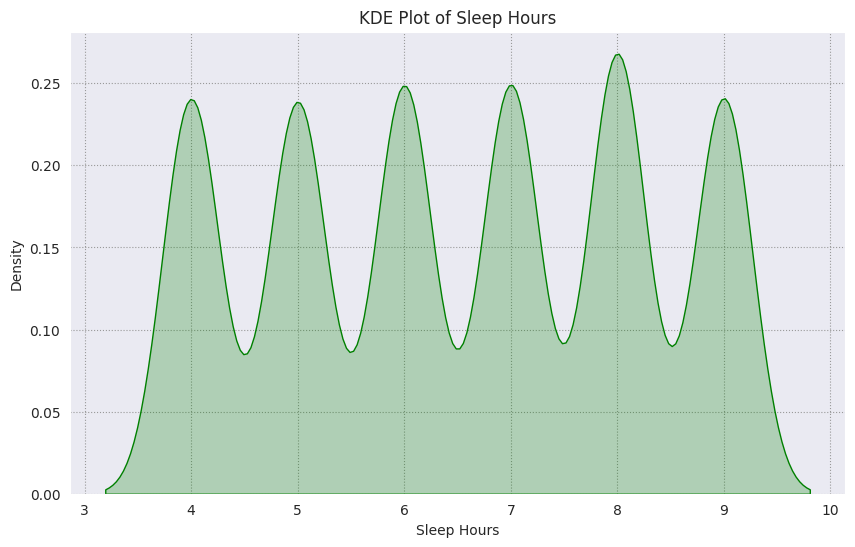

In [74]:
# KDE plot for "Sleep Hours"
plt.figure(figsize=(10, 6))
sns.kdeplot(df["Sleep Hours"], fill=True, color="green")
plt.title("KDE Plot of Sleep Hours")
plt.xlabel("Sleep Hours")
plt.ylabel("Density")
plt.show()

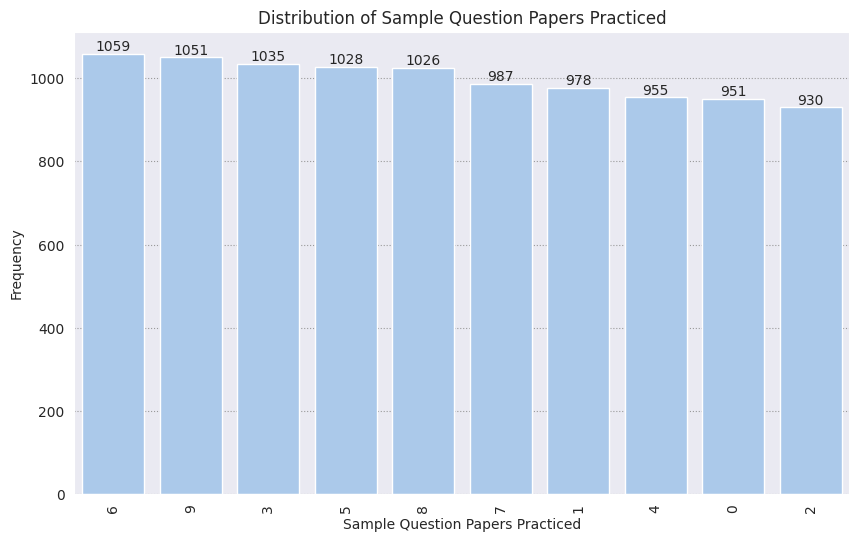

In [59]:
# Visualizing distribution of "Sample Question Papers Practiced"
count_plot(column_name="Sample Question Papers Practiced", data=df, rotation=90, title="Distribution of Sample Question Papers Practiced")


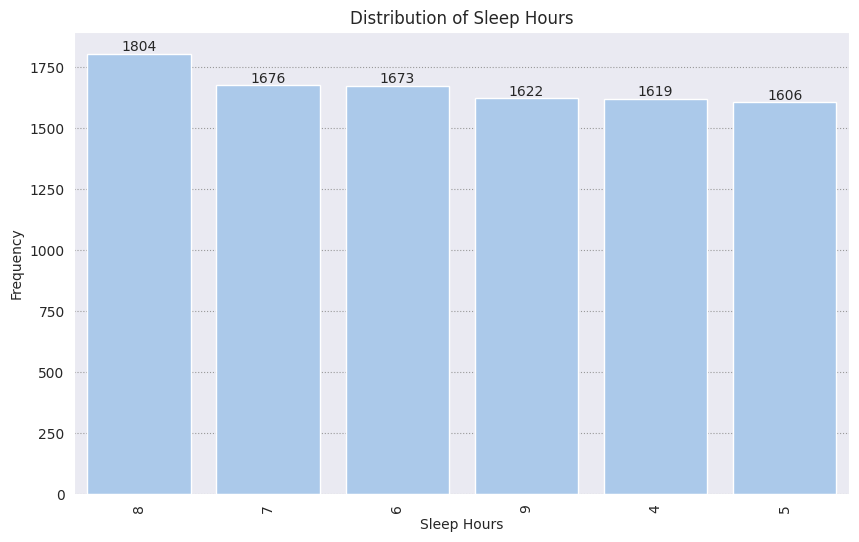

In [60]:
# Visualizing distribution of "Sleep Hours"
count_plot(column_name="Sleep Hours", data=df, rotation=90, title="Distribution of Sleep Hours")

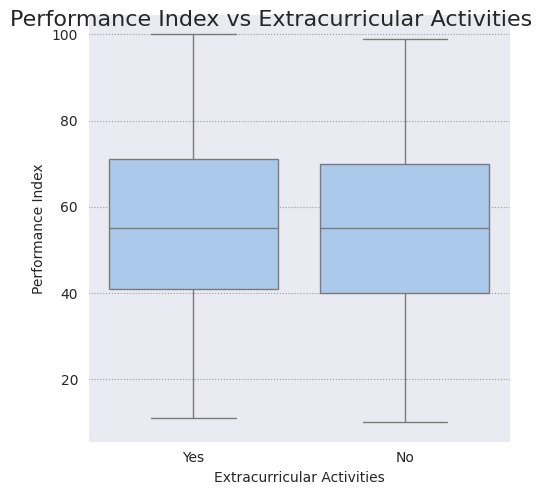

In [61]:
# Exploring the relationship between "Extracurricular Activities" and "Performance Index"
box_plot(x_axis="Extracurricular Activities", y_axis="Performance Index", data=df, title="Performance Index vs Extracurricular Activities")

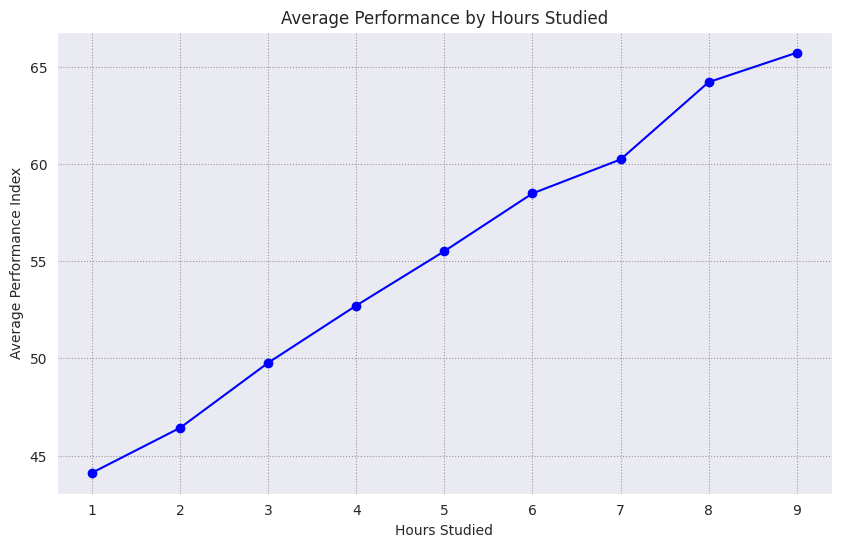

In [62]:
# Average performance by "Hours Studied"
avg_performance_by_hours = df.groupby('Hours Studied')['Performance Index'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values, marker='o', color='b')
plt.title('Average Performance by Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Average Performance Index')
plt.grid(True)
plt.show()

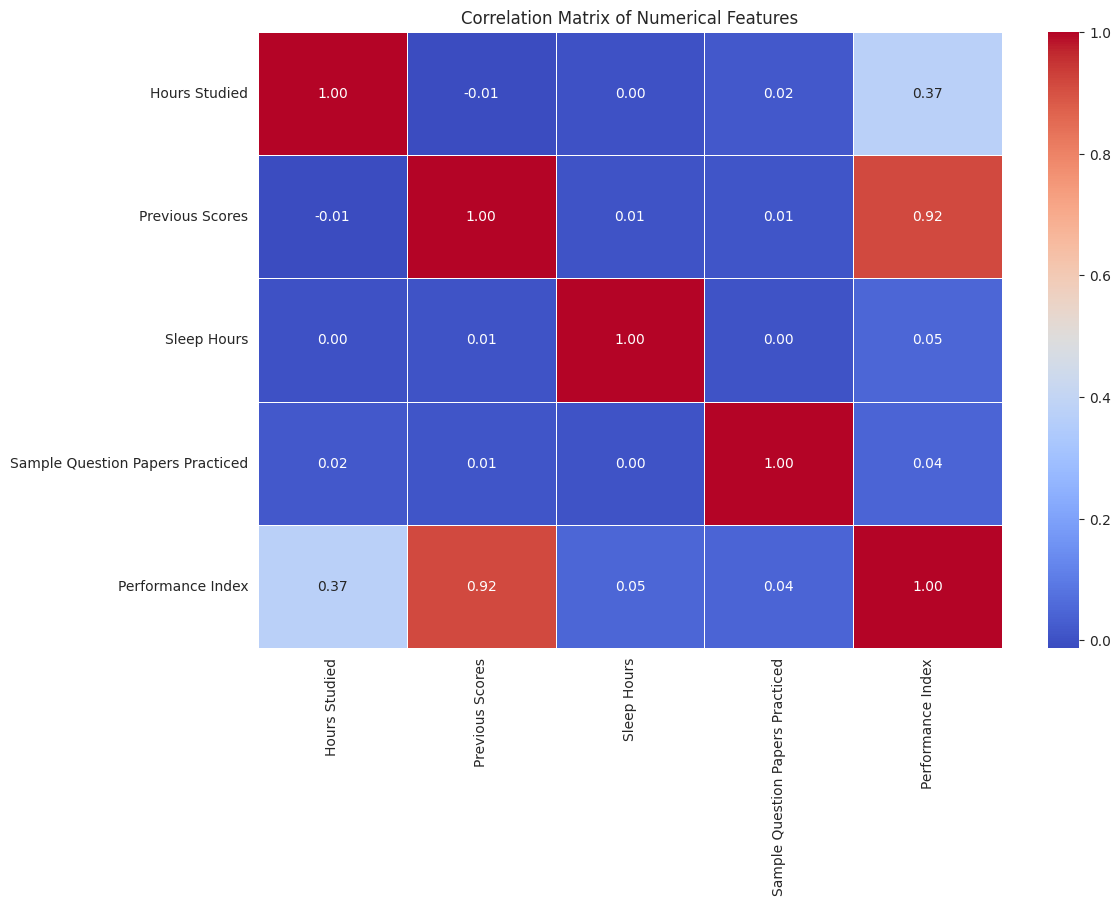

In [ ]:
# Correlation matrix heatmap for numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [75]:
# Import libraries for modeling
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
# Encode categorical variables (like Extracurricular Activities)
encoder = LabelEncoder()
df["Extracurricular Activities"] = encoder.fit_transform(df["Extracurricular Activities"])


In [77]:
# Splitting the dataset into features (X) and target (y)
X = df.drop(columns="Performance Index")
y = df["Performance Index"]


In [78]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
# Scale the data using MinMaxScaler for better performance in models like RandomForest, Ridge
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [80]:
# --- Model 1: Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)


LinearRegression()

In [81]:
# Predictions
lr_pred = np.round(lr_model.predict(X_test_scaled), decimals=1)

In [82]:
# Evaluation
print("\nLinear Regression:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, lr_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, lr_pred))
print("R2 Score:", r2_score(y_test, lr_pred))
print("Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)



Linear Regression:
Mean Absolute Error (MAE): 1.612
Mean Squared Error (MSE): 4.08737
R2 Score: 0.9889704960519785
Coefficients: [22.81987144 60.00230374  0.60861668  2.38470742  1.72648297]
Intercept: 11.517831608538572


In [83]:
# --- Model 2: Random Forest Regressor ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [85]:
# Predictions
rf_pred = np.round(rf_model.predict(X_test_scaled), decimals=1)

In [86]:
# Evaluation
print("\nRandom Forest Regression:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, rf_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, rf_pred))
print("R2 Score:", r2_score(y_test, rf_pred))



Random Forest Regression:
Mean Absolute Error (MAE): 1.8159999999999998
Mean Squared Error (MSE): 5.17276
R2 Score: 0.986041641240659


In [87]:
# --- Model 3: Ridge Regression ---
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)


Ridge()

In [88]:
# Predictions
ridge_pred = np.round(ridge_model.predict(X_test_scaled), decimals=1)

# Evaluation
print("\nRidge Regression:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, ridge_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, ridge_pred))
print("R2 Score:", r2_score(y_test, ridge_pred))



Ridge Regression:
Mean Absolute Error (MAE): 1.6128
Mean Squared Error (MSE): 4.09133
R2 Score: 0.9889598102477488


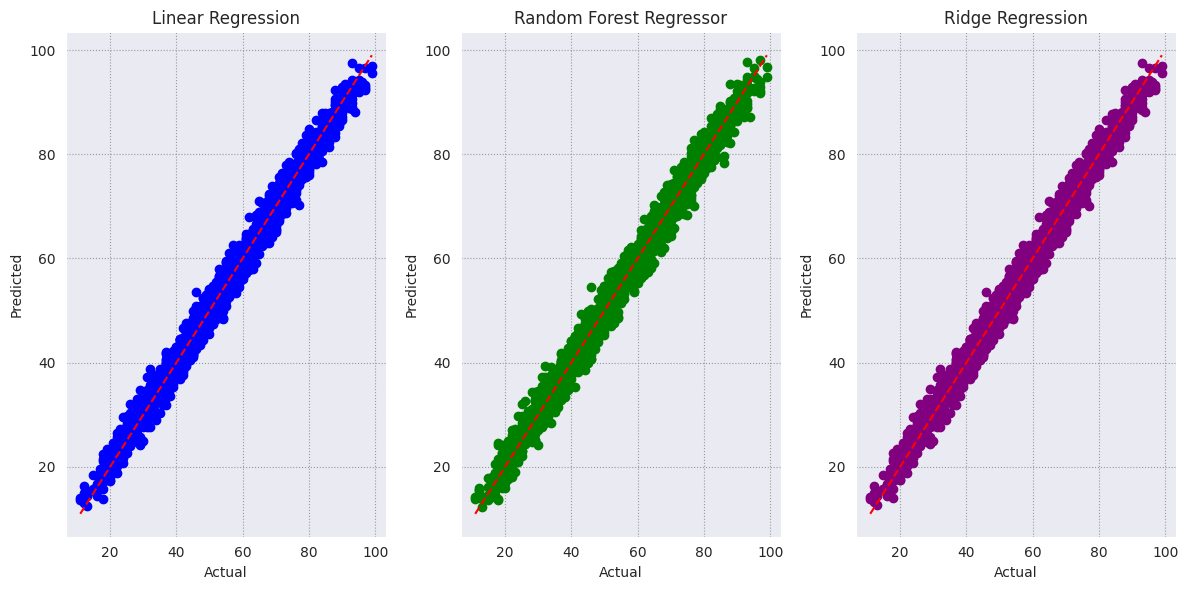

In [90]:
# --- Visualization: Comparison of Actual vs Predicted ---
plt.figure(figsize=(12, 6))

# Scatter plot for Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, lr_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Scatter plot for Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test, rf_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Random Forest Regressor')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Scatter plot for Ridge Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, ridge_pred, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Ridge Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


In [91]:
# --- Model Comparison ---
models = ["Linear Regression", "Random Forest", "Ridge Regression"]
mae_values = [
    mean_absolute_error(y_test, lr_pred),
    mean_absolute_error(y_test, rf_pred),
    mean_absolute_error(y_test, ridge_pred)
]

mse_values = [
    mean_squared_error(y_test, lr_pred),
    mean_squared_error(y_test, rf_pred),
    mean_squared_error(y_test, ridge_pred)
]

r2_values = [
    r2_score(y_test, lr_pred),
    r2_score(y_test, rf_pred),
    r2_score(y_test, ridge_pred)
]

In [92]:

# Creating a comparison DataFrame
comparison_df = pd.DataFrame({
    "Model": models,
    "Mean Absolute Error": mae_values,
    "Mean Squared Error": mse_values,
    "R2 Score": r2_values
})

print("\nModel Comparison:")
print(comparison_df)


Model Comparison:
               Model  Mean Absolute Error  Mean Squared Error  R2 Score
0  Linear Regression               1.6120             4.08737  0.988970
1      Random Forest               1.8160             5.17276  0.986042
2   Ridge Regression               1.6128             4.09133  0.988960


time for using the cross validation and get best params

In [94]:
# Import libraries for Hyperparameter Tuning and Cross-Validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import joblib  # For saving models

In [95]:
# --- Model 1: Hyperparameter Tuning for Ridge Regression ---
ridge_param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Testing various regularization strengths
}

ridge_grid_search = GridSearchCV(Ridge(), ridge_param_grid, cv=5, scoring='neg_mean_absolute_error')
ridge_grid_search.fit(X_train_scaled, y_train)

# Best parameters for Ridge Regression
print("\nBest parameters for Ridge Regression:", ridge_grid_search.best_params_)

# Get the best model and evaluate it
best_ridge_model = ridge_grid_search.best_estimator_
ridge_pred = np.round(best_ridge_model.predict(X_test_scaled), decimals=1)

# Evaluation
print("\nRidge Regression (GridSearchCV):")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, ridge_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, ridge_pred))
print("R2 Score:", r2_score(y_test, ridge_pred))


Best parameters for Ridge Regression: {'alpha': 0.1}

Ridge Regression (GridSearchCV):
Mean Absolute Error (MAE): 1.61245
Mean Squared Error (MSE): 4.088725
R2 Score: 0.988966839671996


In [96]:
# --- Model 2: Hyperparameter Tuning for Random Forest Regressor ---
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, n_iter=10, cv=5, scoring='neg_mean_absolute_error', random_state=42)
rf_random_search.fit(X_train_scaled, y_train)

# Best parameters for Random Forest Regressor
print("\nBest parameters for Random Forest Regressor:", rf_random_search.best_params_)

# Get the best model and evaluate it
best_rf_model = rf_random_search.best_estimator_
rf_pred = np.round(best_rf_model.predict(X_test_scaled), decimals=1)

# Evaluation
print("\nRandom Forest Regressor (RandomizedSearchCV):")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, rf_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, rf_pred))
print("R2 Score:", r2_score(y_test, rf_pred))


Best parameters for Random Forest Regressor: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': True}

Random Forest Regressor (RandomizedSearchCV):
Mean Absolute Error (MAE): 1.7210500000000002
Mean Squared Error (MSE): 4.672095
R2 Score: 0.9873926534059722


In [97]:
# --- Cross-Validation for Reliability ---
# Cross-validation for Ridge Model
ridge_cv_score = cross_val_score(best_ridge_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
print("\nRidge Regression - Cross-Validation Scores:", ridge_cv_score)
print("Ridge CV Mean Score:", ridge_cv_score.mean())

# Cross-validation for Random Forest Model
rf_cv_score = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
print("\nRandom Forest Regressor - Cross-Validation Scores:", rf_cv_score)
print("RF CV Mean Score:", rf_cv_score.mean())



Ridge Regression - Cross-Validation Scores: [-1.62098033 -1.65023246 -1.59997862 -1.63514201 -1.59968927]
Ridge CV Mean Score: -1.6212045364192285

Random Forest Regressor - Cross-Validation Scores: [-1.78051647 -1.77913216 -1.72936582 -1.8076166  -1.75253   ]
RF CV Mean Score: -1.7698322124723245


In [98]:
# --- Save the Best Models ---
# Save the Ridge model
joblib.dump(best_ridge_model, 'best_ridge_model.pkl')

# Save the Random Forest model
joblib.dump(best_rf_model, 'best_rf_model.pkl')


['best_rf_model.pkl']

In [100]:
joblib.dump(scaler, 'scaler.pkl') 

['scaler.pkl']

In [99]:
# --- Model Performance Comparison ---
models = ["Linear Regression", "Random Forest (Best)", "Ridge Regression (Best)"]
mae_values = [
    mean_absolute_error(y_test, lr_pred),
    mean_absolute_error(y_test, rf_pred),
    mean_absolute_error(y_test, ridge_pred)
]

mse_values = [
    mean_squared_error(y_test, lr_pred),
    mean_squared_error(y_test, rf_pred),
    mean_squared_error(y_test, ridge_pred)
]

r2_values = [
    r2_score(y_test, lr_pred),
    r2_score(y_test, rf_pred),
    r2_score(y_test, ridge_pred)
]

# Creating a comparison DataFrame
comparison_df = pd.DataFrame({
    "Model": models,
    "Mean Absolute Error": mae_values,
    "Mean Squared Error": mse_values,
    "R2 Score": r2_values
})

print("\nModel Comparison (After Hyperparameter Tuning):")
print(comparison_df)


Model Comparison (After Hyperparameter Tuning):
                     Model  Mean Absolute Error  Mean Squared Error  R2 Score
0        Linear Regression              1.61200            4.087370  0.988970
1     Random Forest (Best)              1.72105            4.672095  0.987393
2  Ridge Regression (Best)              1.61245            4.088725  0.988967


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Final Thoughts:
From the Model Comparison after Hyperparameter Tuning, we can draw the following conclusions:

Linear Regression:

MAE: 1.612

MSE: 4.087

R²: 0.989

Strengths: Linear Regression performed exceptionally well, with an excellent R² score. It indicates that the model can explain about 98.9% of the variance in the target variable, which is quite good for a linear model.

Conclusion: Linear Regression is a simple, interpretable model that works well for this dataset.

Random Forest (Best):

MAE: 1.721

MSE: 4.672

R²: 0.987

Strengths: Random Forest is a more complex, non-linear model that did a great job capturing the patterns in the data. The R² score is slightly lower than Linear Regression, but still very high at 98.7%. It handles interactions and non-linearities better than Linear Regression.

Conclusion: While Random Forest gave slightly worse performance than Linear Regression in this case, it might be more flexible for future datasets or more complex patterns.

Ridge Regression (Best):

MAE: 1.612

MSE: 4.089

R²: 0.989

Strengths: Ridge Regression, which adds regularization, achieved almost identical performance to Linear Regression. The slight differences in the metrics are negligible, and the regularization helps to prevent overfitting, especially when there are correlations between features.

Conclusion: Ridge Regression is also a solid option, and it behaves very similarly to Linear Regression in terms of performance, with the added benefit of regularization.

Key Takeaways:
Linear Regression and Ridge Regression seem to perform nearly identically in this case, with Ridge offering a slight benefit in terms of overfitting prevention.

Random Forest performed slightly worse in this specific task, but this could be due to the nature of the data or hyperparameters not being perfectly tuned.

The models have extremely high R² values, indicating they fit the data very well and are very effective at making predictions.

Final Recommendation:
If simplicity and interpretability are a priority, Linear Regression or Ridge Regression are your best bets, as they are easy to interpret, and both perform similarly.

Random Forest might be a good option when you expect the relationships between features to be more complex and non-linear, though it didn't outperform the linear models in this case.

